# 内輪向け機械学習コンペ サンプル ノートブック

## ライブラリをインポート

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE

## コンペ配布データ読み込み

### 学習用データ読み込み

In [ ]:
train_df = pd.read_csv(f"./data/train.csv")

In [ ]:
train_df

,id,a,b,c,target
0,1,1,10,100,1
1,2,2,20,200,2
2,3,3,30,300,3
3,4,4,40,400,4
4,5,5,50,500,5
5,6,6,60,600,6
6,7,7,70,700,7
7,8,8,80,800,8
8,9,9,90,900,9
9,10,10,100,1000,10


### 評価用データ読み込み

In [ ]:
test_df = pd.read_csv(f"./data/train.csv")

In [ ]:
test_df

,id,a,b,c,target
0,1,1,10,100,1
1,2,2,20,200,2
2,3,3,30,300,3
3,4,4,40,400,4
4,5,5,50,500,5
5,6,6,60,600,6
6,7,7,70,700,7
7,8,8,80,800,8
8,9,9,90,900,9
9,10,10,100,1000,10


### サンプル投稿ファイル読み込み

In [ ]:
submit = pd.read_csv(f"./data/sample_submission.csv")

In [ ]:
submit

,id,target
0,101,1
1,102,1
2,103,1
3,104,1
4,105,1
5,106,1
6,107,1
7,108,1
8,109,1
9,110,1


## 前処理

### 説明変数、目的変数に分割

In [ ]:
X = train_df[["a", "b"]]
y = train_df["c"]

In [ ]:
X

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,90
9,10,100


In [ ]:
y

,c
0,100
1,200
2,300
3,400
4,500
5,600
6,700
7,800
8,900
9,1000


In [ ]:
X_test = test_df[["a", "b"]]

In [ ]:
X_test

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,90
9,10,100


### 訓練用データ、検証用データに分割

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y)

In [ ]:
X_train

,a,b
4,5,50
7,8,80
8,9,90
2,3,30
6,7,70
0,1,10
3,4,40


In [ ]:
y_train

,c
4,500
7,800
8,900
2,300
6,700
0,100
3,400


In [ ]:
X_eval

,a,b
9,10,100
1,2,20
5,6,60


In [ ]:
y_eval

,c
9,1000
1,200
5,600


## モデルを訓練

In [ ]:
model = LR()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## 訓練済みモデルによる予測（検証用データ）

In [ ]:
y_pred_eval = model.predict(X_eval)

In [ ]:
y_pred_eval

array([1000.,  200.,  600.])

予測精度の可視化

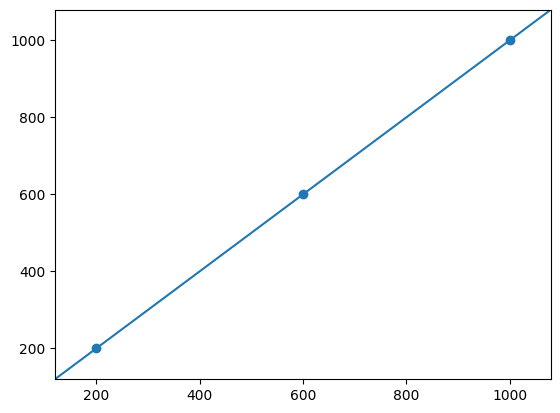

In [ ]:
plt.scatter(y_eval, y_pred_eval)

y_eval_min = np.min(y_eval)
y_eval_max = np.max(y_eval)
y_pred_eval_min = np.min(y_pred_eval)
y_pred_eval_max = np.max(y_pred_eval)
y_min = np.minimum(y_eval_min, y_pred_eval_min)
y_max = np.maximum(y_eval_max, y_pred_eval_max)

y_range = y_max - y_min

lim_min = y_min - (y_range * 0.1)
lim_max = y_max + (y_range * 0.1)

plt.xlim([lim_min, lim_max])
plt.ylim([lim_min, lim_max])

plt.plot([lim_min, lim_max], [lim_min, lim_max])

plt.show()

In [ ]:
mse_eval = MSE(y_eval, y_pred_eval)
rmse_eval = np.sqrt(mse_eval)

In [ ]:
f"{rmse_eval=}"

'rmse_eval=np.float64(1.548048529151268e-13)'

## 訓練済みモデルによる予測（評価用データ）

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_test

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

## 採点用投稿ファイル作成

In [ ]:
submit["target"] = y_pred_test

In [ ]:
submit

,id,target
0,101,100.0
1,102,200.0
2,103,300.0
3,104,400.0
4,105,500.0
5,106,600.0
6,107,700.0
7,108,800.0
8,109,900.0
9,110,1000.0


In [ ]:
submit.to_csv("submit.csv", index=False)